In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Convolution Neural Network (CNN)

In [40]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras import utils

In [15]:
# Creating training set
training_set = keras.preprocessing.image_dataset_from_directory(r'./Cropped_data/Train', 
                                  image_size=(100,100), batch_size = 32, class_names=['Male', 'Female'])
# Creating testing set
testing_set = keras.preprocessing.image_dataset_from_directory(r'./Cropped_data/Test', 
                                  image_size=(100,100), batch_size = 32, class_names=['Male', 'Female'])

Found 8694 files belonging to 2 classes.
Found 2188 files belonging to 2 classes.


In [16]:
# Creating validation set
validation_set = keras.preprocessing.image_dataset_from_directory(r'./Cropped_data/Validation', 
                                  image_size=(100,100), batch_size = 32, class_names=['Male', 'Female'])

Found 2215 files belonging to 2 classes.


In [88]:
model_cnn=Sequential()

model_cnn.add(Convolution2D(32, (3,3) ,input_shape=(100,100,3),activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128,activation='relu'))
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(1,activation='sigmoid'))

In [89]:
model_cnn.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy','AUC'])

In [90]:
hist = model_cnn.fit(training_set,
          batch_size= 512,
          epochs= 12,
          verbose=1,
          validation_data=validation_set)

Epoch 1/12
272/272 [==============================] - 10s 32ms/step - loss: 14.6063 - accuracy: 0.8093 - auc: 0.8449 - val_loss: 0.8159 - val_accuracy: 0.8524 - val_auc: 0.9203
Epoch 2/12
272/272 [==============================] - 9s 33ms/step - loss: 0.4656 - accuracy: 0.8943 - auc: 0.9469 - val_loss: 0.4929 - val_accuracy: 0.8876 - val_auc: 0.9453
Epoch 3/12
272/272 [==============================] - 9s 33ms/step - loss: 0.2395 - accuracy: 0.9309 - auc: 0.9758 - val_loss: 0.4986 - val_accuracy: 0.8921 - val_auc: 0.9436
Epoch 4/12
272/272 [==============================] - 9s 33ms/step - loss: 0.1471 - accuracy: 0.9527 - auc: 0.9884 - val_loss: 0.4993 - val_accuracy: 0.9038 - val_auc: 0.9490
Epoch 5/12
272/272 [==============================] - 9s 32ms/step - loss: 0.0984 - accuracy: 0.9660 - auc: 0.9938 - val_loss: 0.5466 - val_accuracy: 0.8984 - val_auc: 0.9447
Epoch 6/12
272/272 [==============================] - 9s 34ms/step - loss: 0.0823 - accuracy: 0.9734 - auc: 0.9952 - val_lo

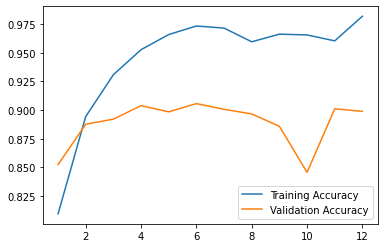

In [91]:
import matplotlib.pyplot as plt
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

### Model Evaluation

In [99]:
score_cnn = model_cnn.evaluate(x=testing_set, verbose=0)
print('CNN Test accuracy:', score[1])
print('CNN Test AUC:', score[2])

CNN Test accuracy: 0.8793418407440186
CNN Test AUC: 0.9290169477462769


In [94]:
from keras.models import save_model
save_model(model_cnn, "./Model/model_cnn.h5")